In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [114]:
df = pd.read_csv("GR_1037 (1).csv",delimiter=";")

In [115]:
DEPT_CORE = np.array([5330.06, 5369.99, 5394.98, 5400.01, 5410.07, 5419.97, 5430.03, 5480.02, 5485.05, 5490.08, 5503.03, 5510.04, 5517.97, 5519.95, 5522.08, 5610.02])
VSH_CORE = np.array([18.4, 29.3, 21.5, 11.5, 27.4, 13.4, 11.1, 6.8, 6.6, 0.5, 0, 6.7, 0.9, 11.4, 9.3, 2.1])

In [116]:
# Converter VSH_CORE para a escala 0-1
VSH_CORE /= 100

In [118]:
# Definir a função Vsh para rochas terciárias segundo Larionov
def vsh_larionov_tertiary(gr, gr_ma, gr_sh):
    Igr = (gr - gr_ma)/(gr_sh-gr_ma)
    return 0.083*((2**(3.7*Igr))-1)

In [95]:
# Parametros iniciais
gr_ma = 0
gr_sh = 200

In [124]:
# Calcular a curva Vsh inicial
df["Vsh"] = vsh_larionov_tertiary(df["GR"], gr_ma, gr_sh)


In [125]:
# Interpolação para obter valores de GR nos pontos de DEPT_CORE
GR_CORE = np.interp(DEPT_CORE, df["MD"], df["GR"])

In [126]:
# Otimização dos parâmetros gr_ma e gr_sh
popt, _ = curve_fit(vsh_larionov_tertiary, GR_CORE, VSH_CORE, p0=(gr_ma, gr_sh))
gr_ma_optimized, gr_sh_optimized = popt



In [127]:
df["Vsh_optimized"] = vsh_larionov_tertiary(df["GR"], gr_ma_optimized, gr_sh_optimized)


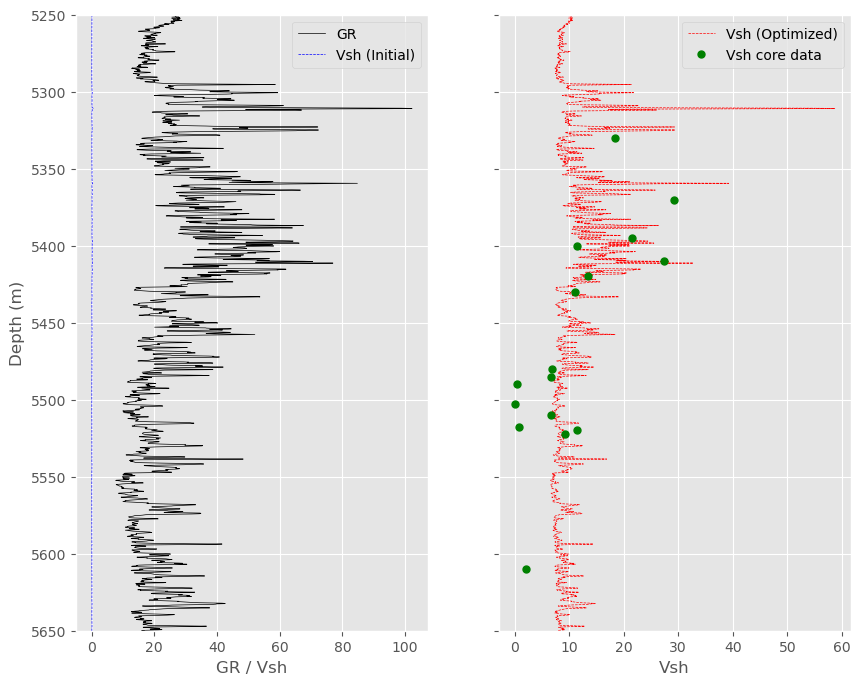

In [128]:
# Plotar os resultados
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10, 8))

# Plot original GR e Vsh
ax[0].set_ylabel("Depth (m)")
ax[0].set_ylim(5250, 5650)
ax[0].invert_yaxis()
ax[0].plot(df["GR"], df["MD"], color="black", linewidth=0.5, label="GR")
ax[0].plot(df["Vsh"], df["MD"], '--', color="blue", linewidth=0.5, label="Vsh (Initial)")
ax[0].set_xlabel("GR / Vsh")
ax[0].legend()

# Plot otimizado Vsh
ax[1].plot(df["Vsh_optimized"], df["MD"], '--', color="red", linewidth=0.5, label="Vsh (Optimized)")
ax[1].plot(VSH_CORE, DEPT_CORE, "o", color="green", ms=5, label="Vsh core data")
ax[1].set_xlabel("Vsh")
ax[1].legend()

plt.show()

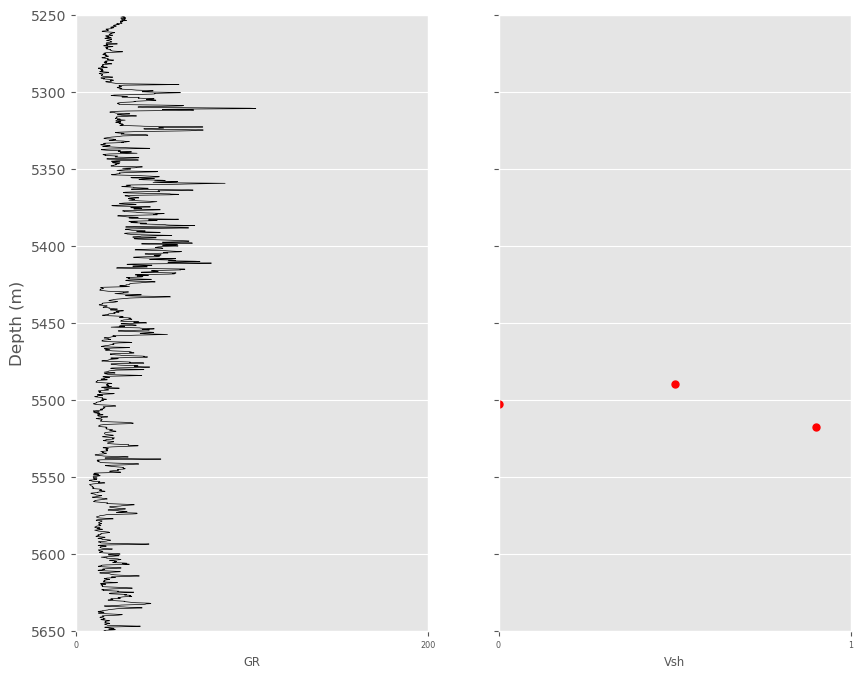

In [131]:
# Plotar os resultados com as configurações personalizadas
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10, 8))

# Eixo 0 - GR
ax[0].set_ylabel("Depth (m)")
ax[0].set_ylim(5250, 5650)
ax[0].set_yticks(range(5250, 5651, 50))
ax[0].invert_yaxis()
ax[0].set_xlabel("GR", fontsize="small")
ax[0].set_xlim(0, 200)
ax[0].set_xticks([0, 200], [0, 200], fontsize="xx-small")
ax[0].plot(df["GR"], df["MD"], color="black", linewidth=0.5)

# Eixo 1 - Vsh
ax[1].set_xlabel("Vsh", fontsize="small")
ax[1].set_xlim(0, 1)
ax[1].set_xticks([0, 1], [0, 1], fontsize="xx-small")
ax[1].plot(df["Vsh_optimized"], df["MD"], "--", color="black", linewidth=0.5)
ax[1].plot(VSH_CORE, DEPT_CORE, "o", color="red", ms=5, label="Vsh core")
#ax[1].legend(bbox_to_anchor=(1.1, 0.5))
#ax[1].set_title("Before optimization")


